In [3]:
from sklearn.datasets import load_diabetes
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [4]:
X,y=load_diabetes(return_X_y=True)

In [5]:
print(X.shape)

(442, 10)


In [6]:
print(y.shape)

(442,)


In [103]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [104]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [105]:
print(reg.coef_)  ## 10 coefficent
print(reg.intercept_)   ## 1 intercept

[  29.25401303 -261.7064691   546.29972304  388.39834056 -901.95966819
  506.76324136  121.15435079  288.03526689  659.26895081   41.37670105]
151.00821291456543


In [106]:
y_pred= reg.predict(X_test)
r2_score(y_test,y_pred)

0.4772897164322617

In [107]:
##  creating own batch graident dedcent

In [113]:
class GDRegressor:
    def __init__(self,learning_rate=0.01,epochs=100):

        self.coef_= None
        self.intercept_=None
        self.lr=learning_rate
        self.epochs=epochs

        self.losses = []
        self.coef_history = []
        self.intercept_history = []

    def fit(self,X_train,y_train):

        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])

        for i in range (self.epochs):
            
            y_cap= np.dot(X_train,self.coef_)+ self.intercept_

            error = y_train - y_cap

            intercept_derv= -2*np.mean(y_train - y_cap)           ##  (Yi -Yi') 
            self.intercept_ = self.intercept_ - (self.lr * intercept_derv)

            coeff_derv= -2*np.dot((y_train-y_cap),(X_train))/X_train.shape[0]

            self.coef_ = self.coef_ -(self.lr* coeff_derv)

            loss = np.mean(error**2)
            self.losses.append(loss)
            self.coef_history.append(self.coef_.copy())
            self.intercept_history.append(self.intercept_)

        print(self.intercept_, self.coef_)


    def predict(self,X_test):
        return np.dot(X_test,self.coef_)+ self.intercept_

In [156]:
gD= GDRegressor(epochs=100000,learning_rate=0.001)

In [157]:
gD.fit(X_train,y_train)

151.6663300616342 [  57.24713041  -46.29452524  276.69525793  196.4757602    21.79425487
    6.00813454 -156.87385032  141.25792683  207.90653858  131.44450697]


In [158]:
y_pred=gD.predict(X_test)

In [159]:
r2_score(y_test,y_pred)

0.43033786466189217

In [160]:
# Visualization 1 — Line movement

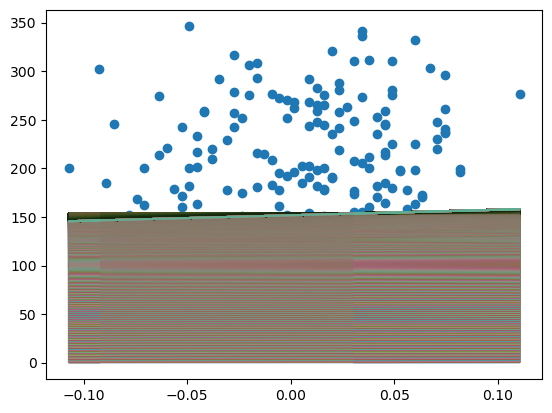

In [161]:
import matplotlib.pyplot as plt

plt.scatter(X_train[:,0], y_train)

for i in range(len(gD.coef_history)):
    y_pred = gD.coef_history[i][0]*X_train[:,0] + gD.intercept_history[i]
    plt.plot(X_train[:,0], y_pred, alpha=0.5)

plt.show()


In [162]:
##  Visualization 2 — Loss vs Epochs 

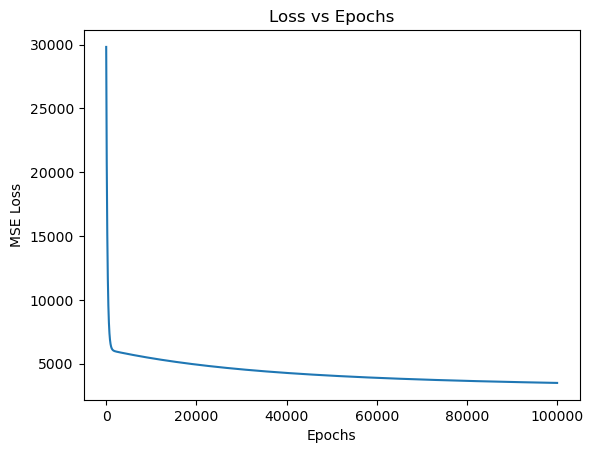

In [163]:
plt.plot(gD.losses)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Loss vs Epochs")
plt.show()


In [164]:
##   Visualization 3 — Coefficient convergence

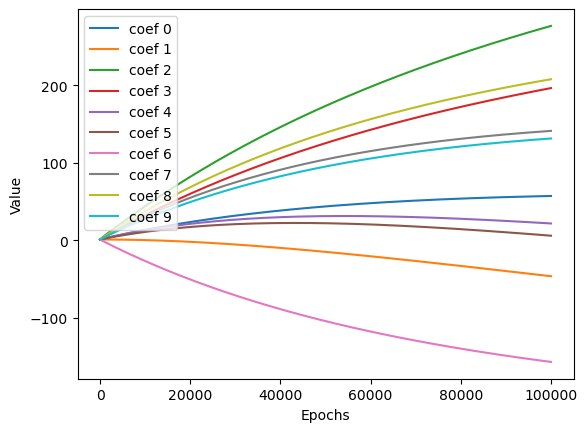

In [165]:
coef_history = np.array(gD.coef_history)

for i in range(coef_history.shape[1]):
    plt.plot(coef_history[:, i], label=f"coef {i}")

plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend()
plt.show()